<a href="https://colab.research.google.com/github/joomj2000/OpenCV/blob/main/morphological.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab.patches import cv2_imshow

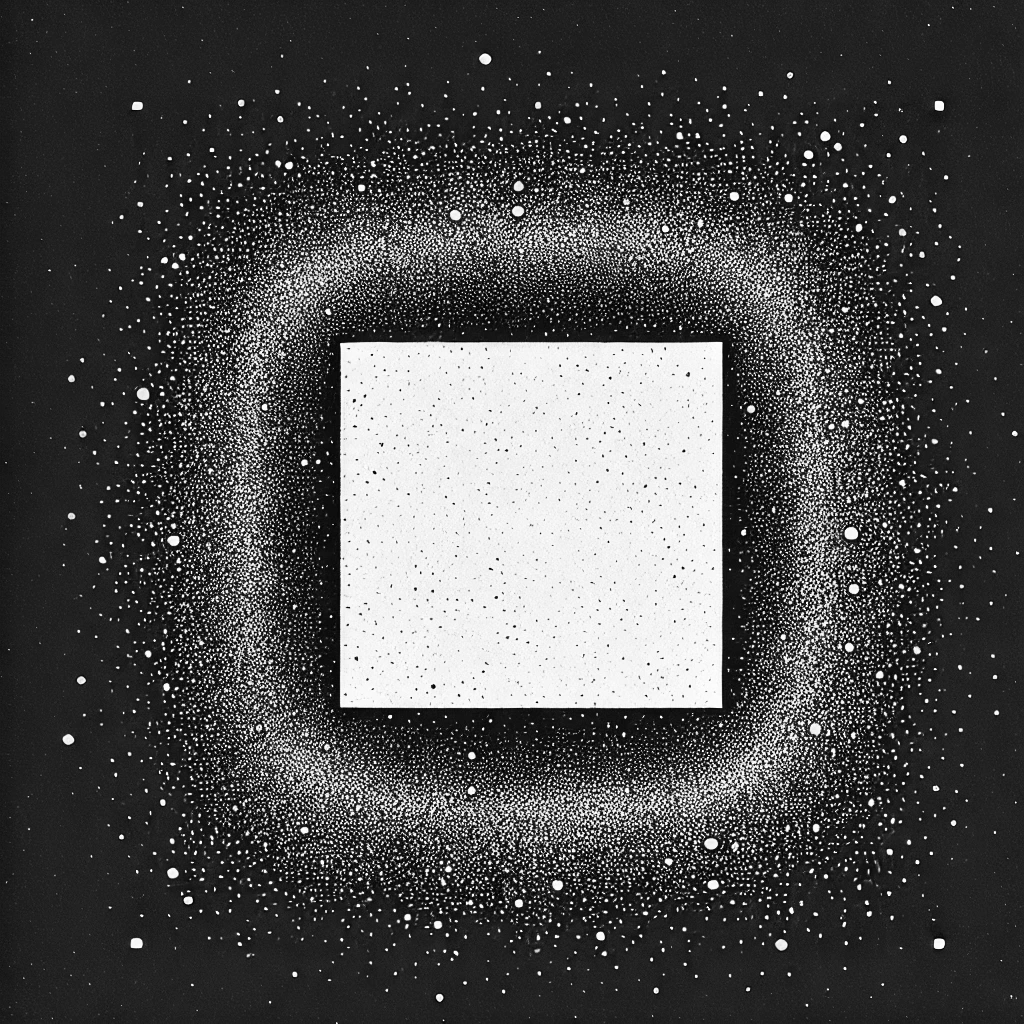

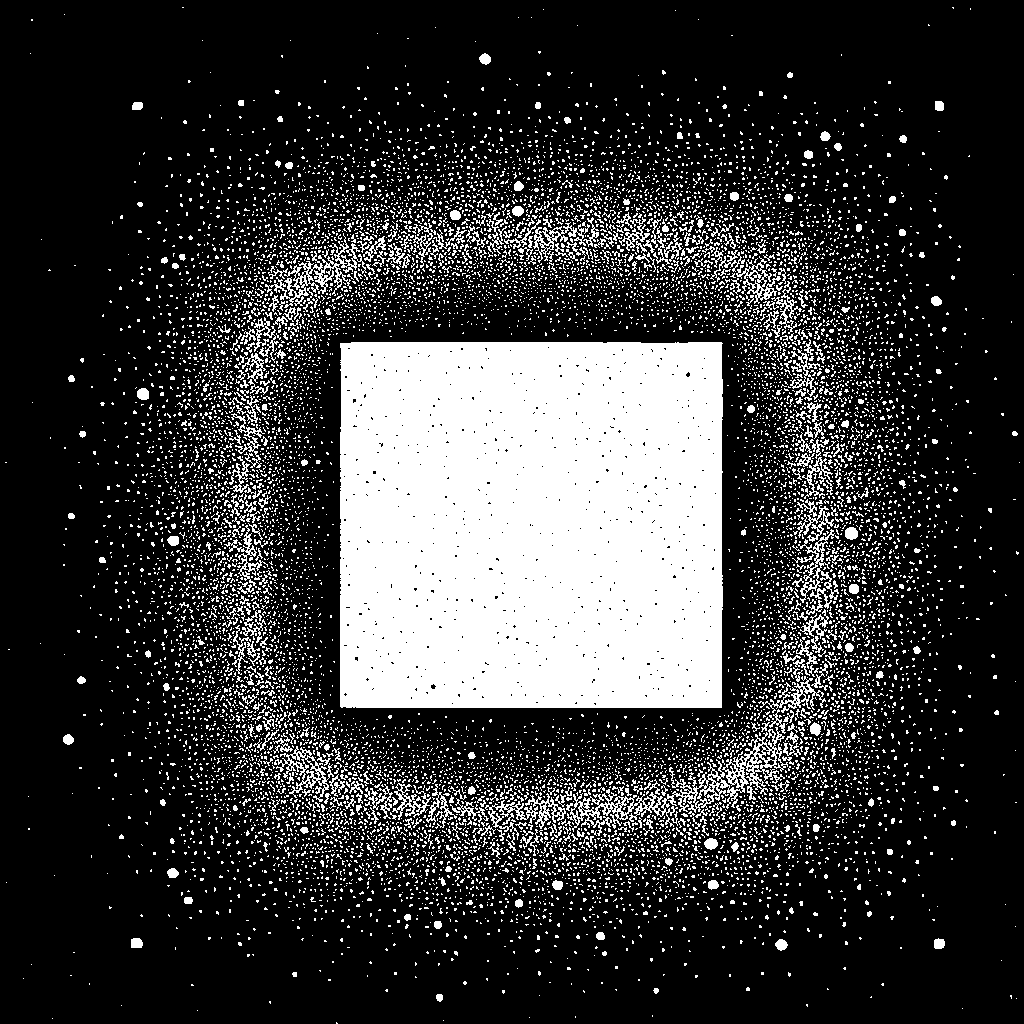

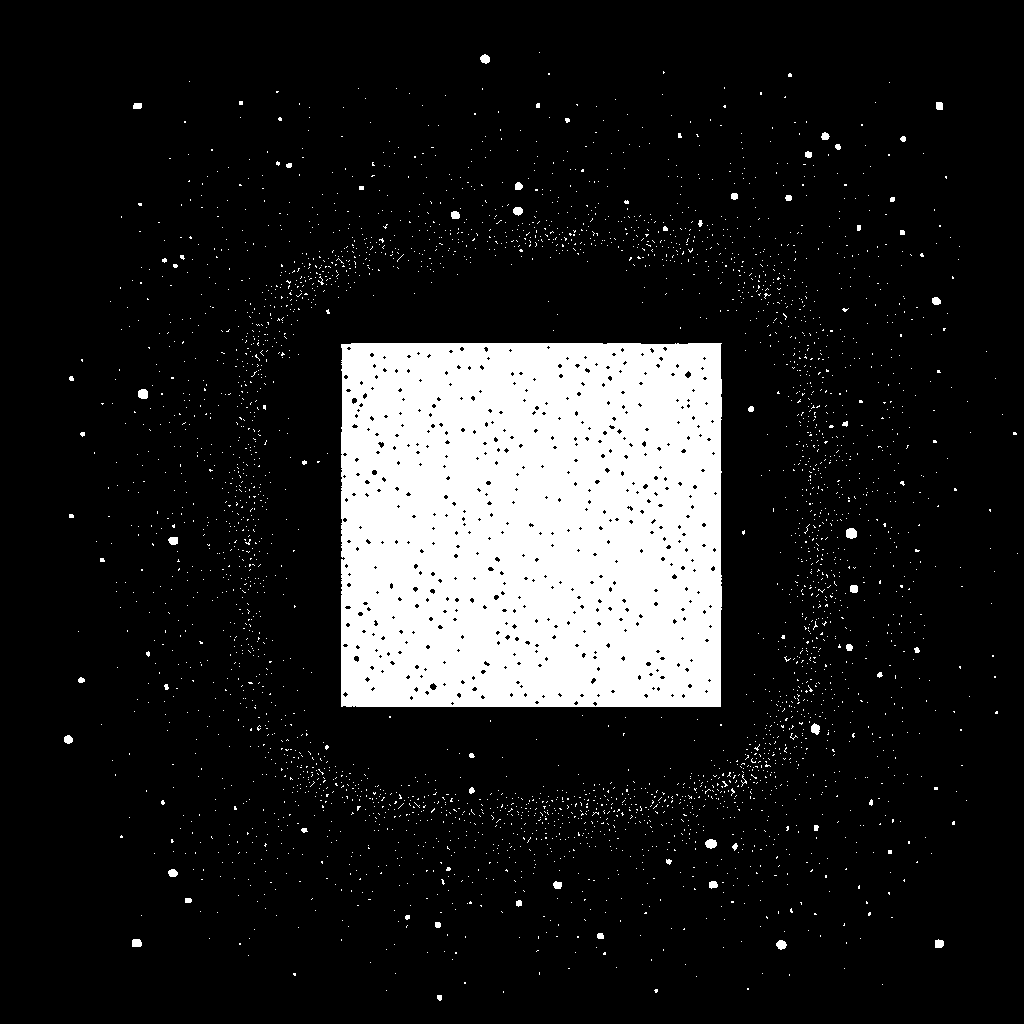

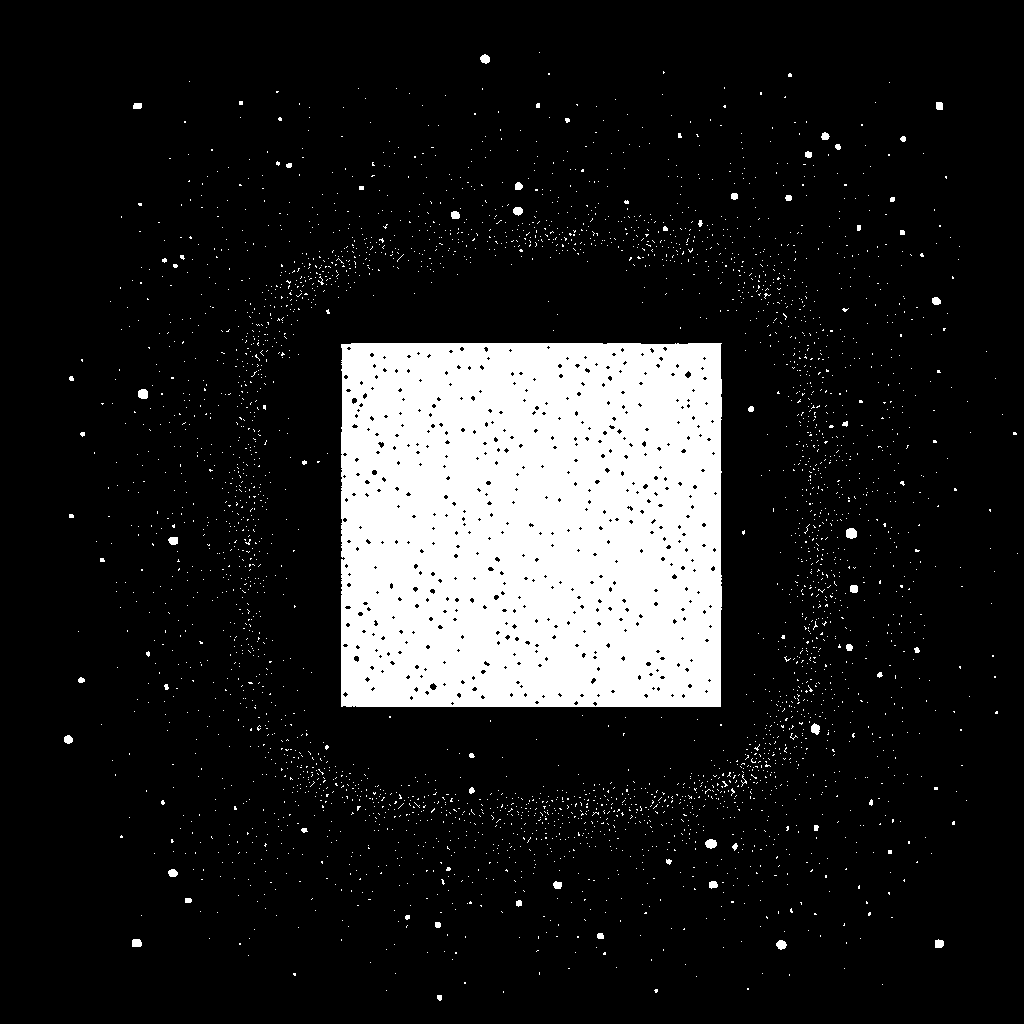

-1

In [5]:
import numpy as np, cv2

def erode(img, mask=None):
    dst = np.zeros(img.shape, np.uint8)
    if mask is None: mask = np.ones((3, 3), np.uint8)
    ycenter, xcenter = np.divmod(mask.shape[:2], 2)[0]

    mcnt = cv2.countNonZero(mask)
    for i in range(ycenter, img.shape[0] - ycenter):           # 입력 행렬 반복 순회
        for j in range(xcenter, img.shape[1] - xcenter):
            y1, y2 = i - ycenter, i + ycenter + 1              # 마스크 높이 범위
            x1, x2 = j - xcenter, j + xcenter + 1              # 마스크 너비 범위
            roi = img[y1:y2, x1:x2]                            # 마스크 영역
            temp = cv2.bitwise_and(roi, mask)
            cnt  =  cv2.countNonZero(temp)                     # 일치한 화소수 계산
            dst[i, j] = 255 if (cnt == mcnt) else 0            # 출력 화소에 저장
    return dst

image = cv2.imread("/content/morph.webp", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

data = [0, 1, 0,                                               # 마스크 선언 및 초기화
        1, 1, 1,
        0, 1, 0]
mask = np.array(data, np.uint8).reshape(3, 3)
th_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]  # 영상 이진화

dst1 = erode(th_img, mask)                                     # 사용자 정의 침식 함수
dst2 = cv2.erode(th_img, mask)
# dst2 = cv2.morphologyEx(th_img, cv2.MORPH_ERODE, mask)         # OpenCV의 침식 함수

cv2_imshow(image)
cv2_imshow(th_img)
cv2_imshow(dst1)
cv2_imshow(dst2)
cv2.waitKey(0)

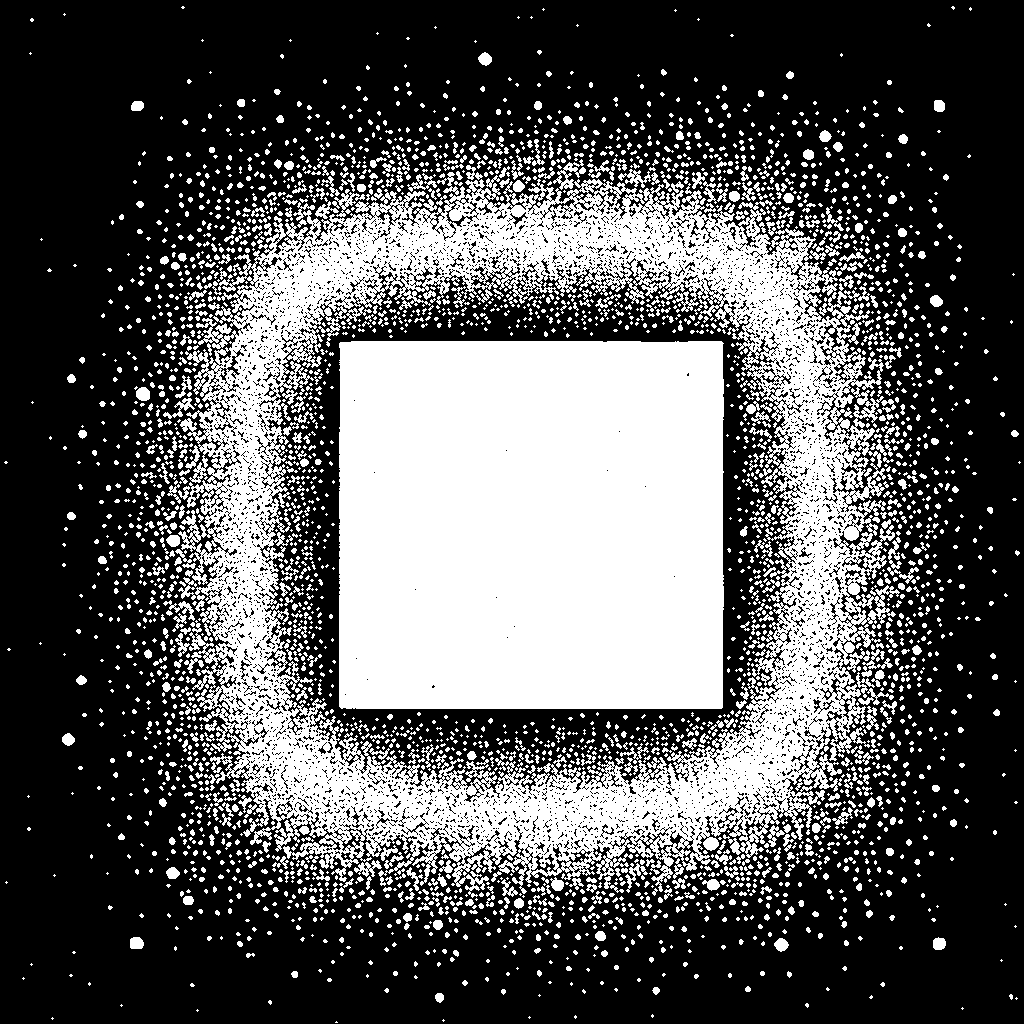

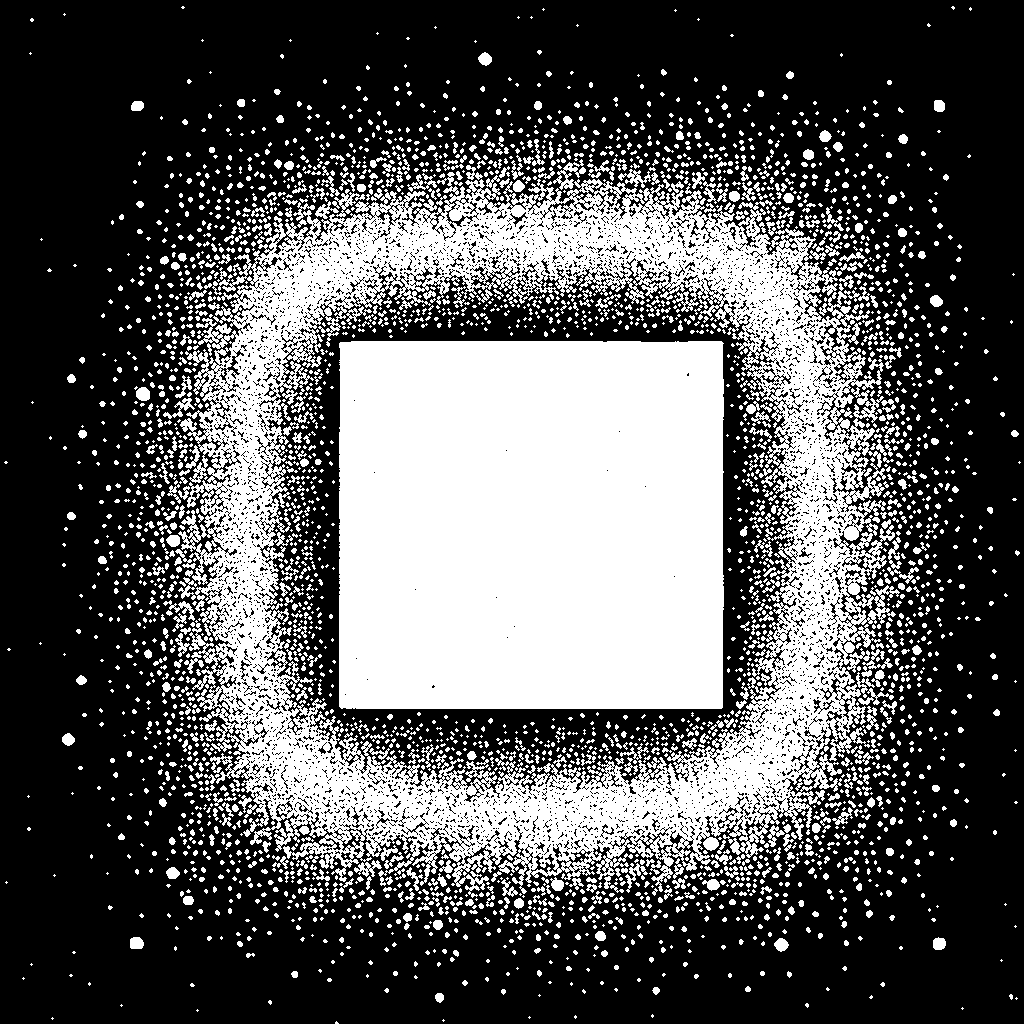

-1

In [6]:
import numpy as np, cv2

def dilate(img, mask):
    dst = np.zeros(img.shape, np.uint8)
    if mask is None: mask = np.ones((3, 3), np.uint8)
    ycenter, xcenter = np.divmod(mask.shape[:2], 2)[0]

    for i in range(ycenter, img.shape[0] - ycenter):    # 입력 행렬 반복 순회
        for j in range(xcenter, img.shape[1] - xcenter):
            y1, y2 = i - ycenter, i + ycenter + 1       # 마스크 높이 범위
            x1, x2 = j - xcenter, j + xcenter + 1       # 마스크 너비 범위
            roi = img[y1:y2, x1:x2]                     # 마스크 영역
            temp = cv2.bitwise_and(roi, mask)
            cnt  = cv2.countNonZero(temp)
            dst[i, j] = 0 if (cnt == 0) else 255  # 출력 화소에 저장
    return dst

image = cv2.imread("/content/morph.webp", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

mask = np.array([[0, 1, 0],                         # 마스크 초기화
                 [1, 1, 1],
                 [0, 1, 0]]).astype("uint8")
th_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]  # 영상 이진화
dst1 = dilate(th_img, mask)                              # 사용자 정의 팽창 함수
dst2 = cv2.dilate(th_img, mask)
# dst2 = cv2.morphologyEx(th_img, cv2.MORPH_DILATE, mask)  # OpenCV의 팽창 함수

cv2_imshow(dst1)
cv2_imshow(dst2)
cv2.waitKey(0)

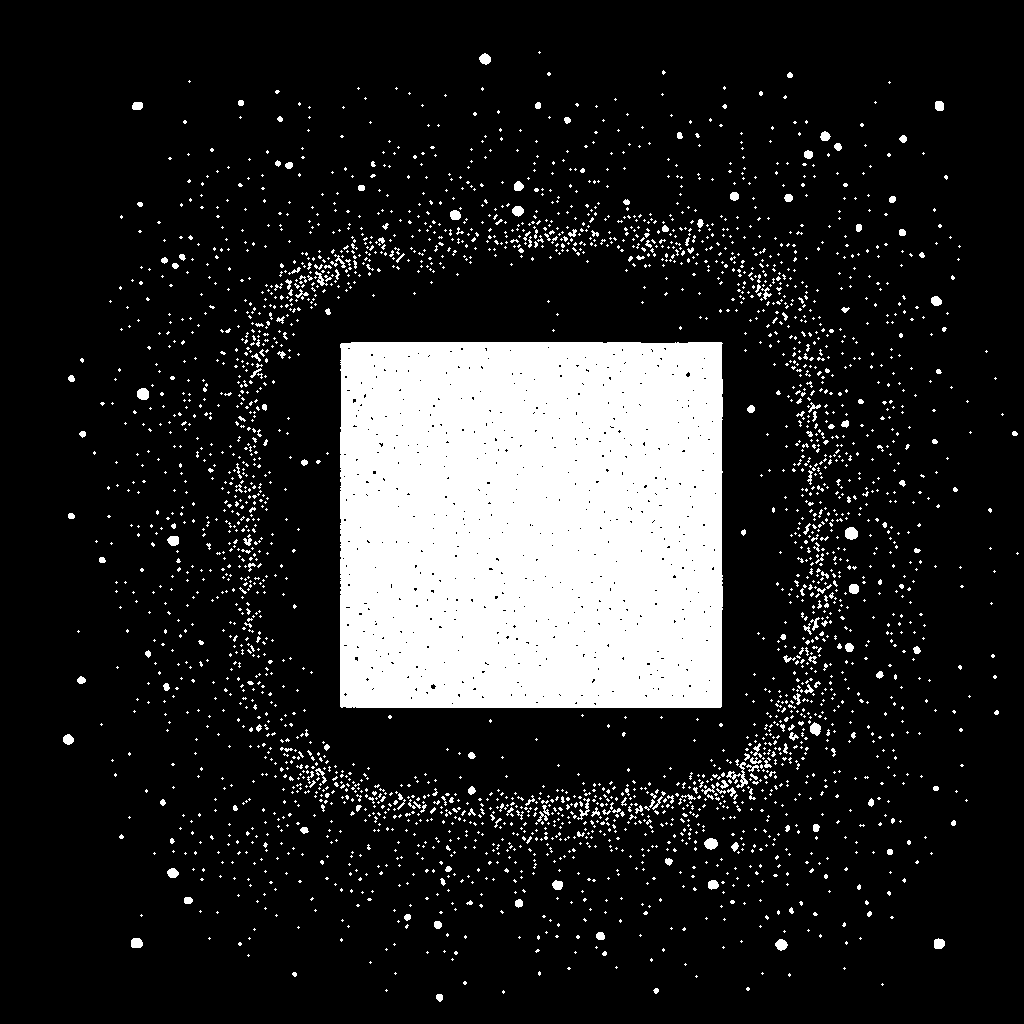

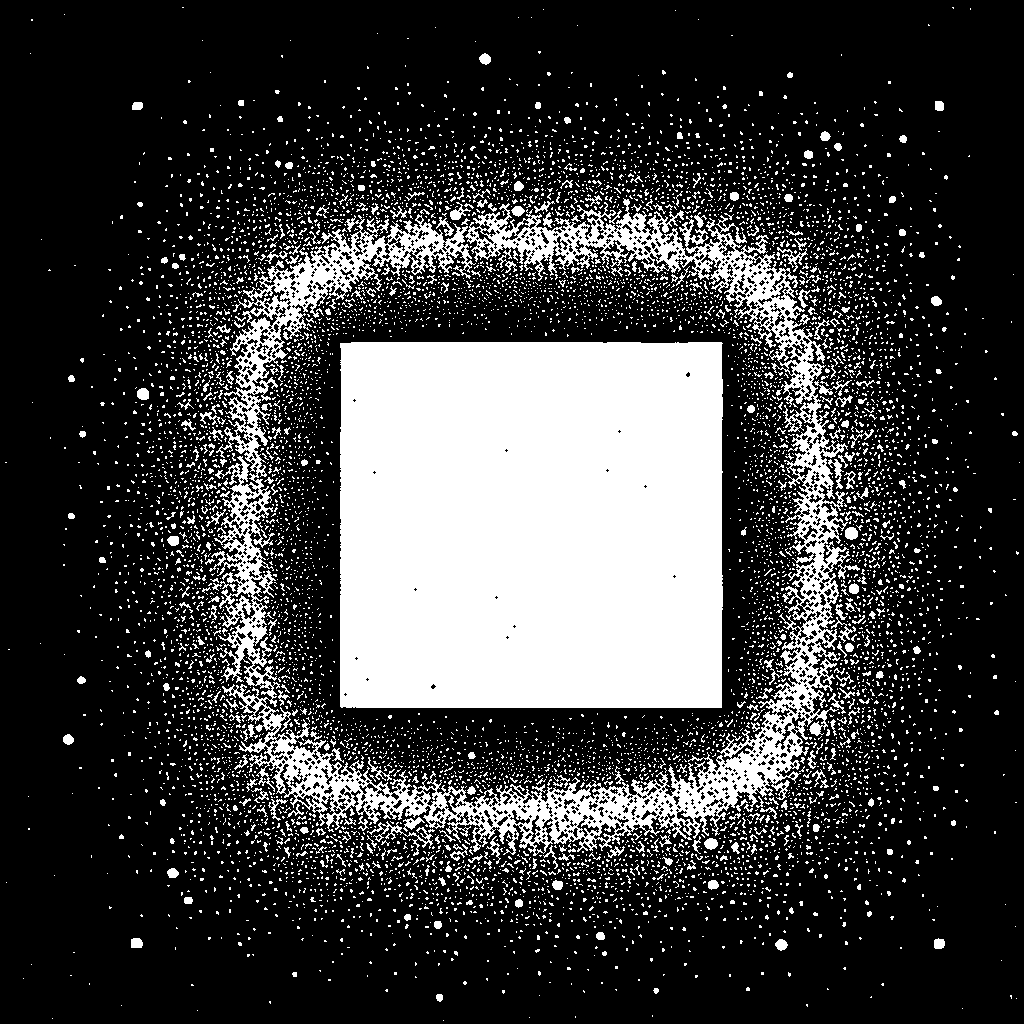

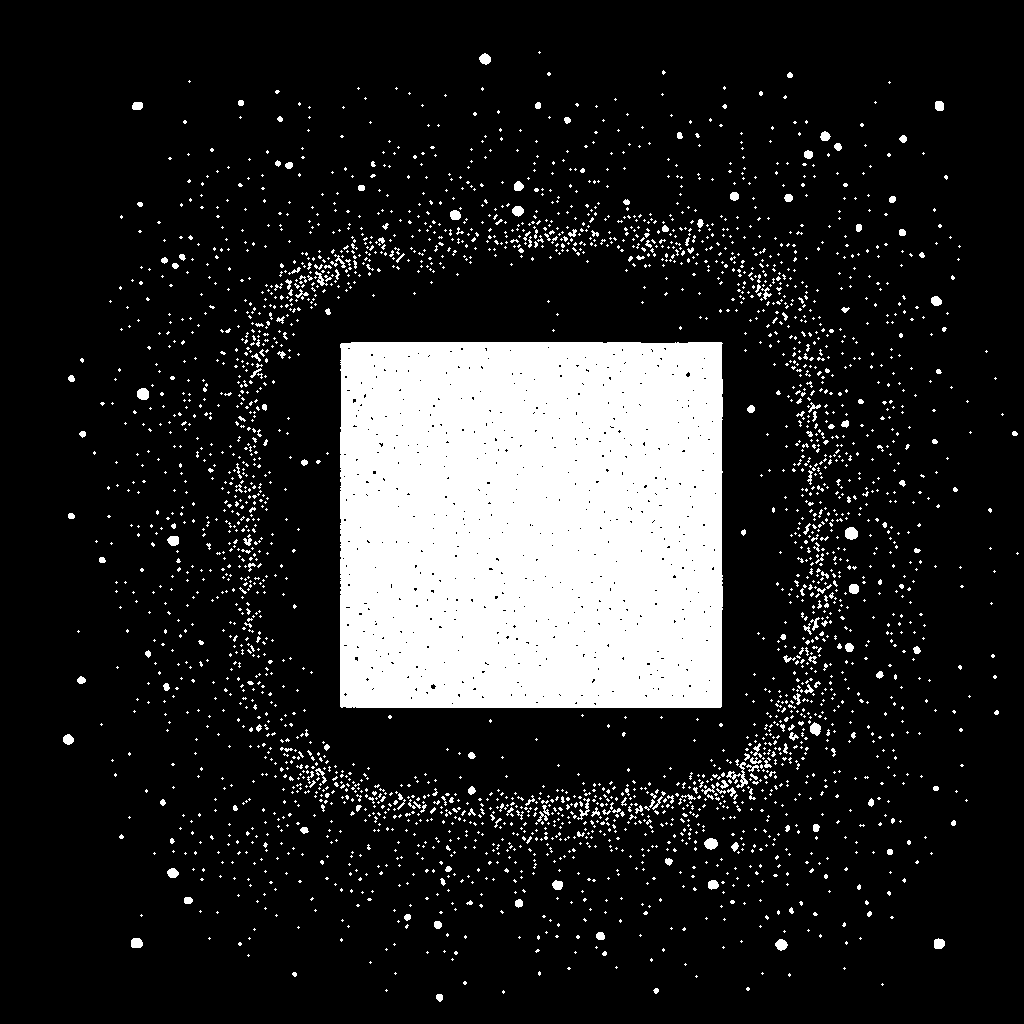

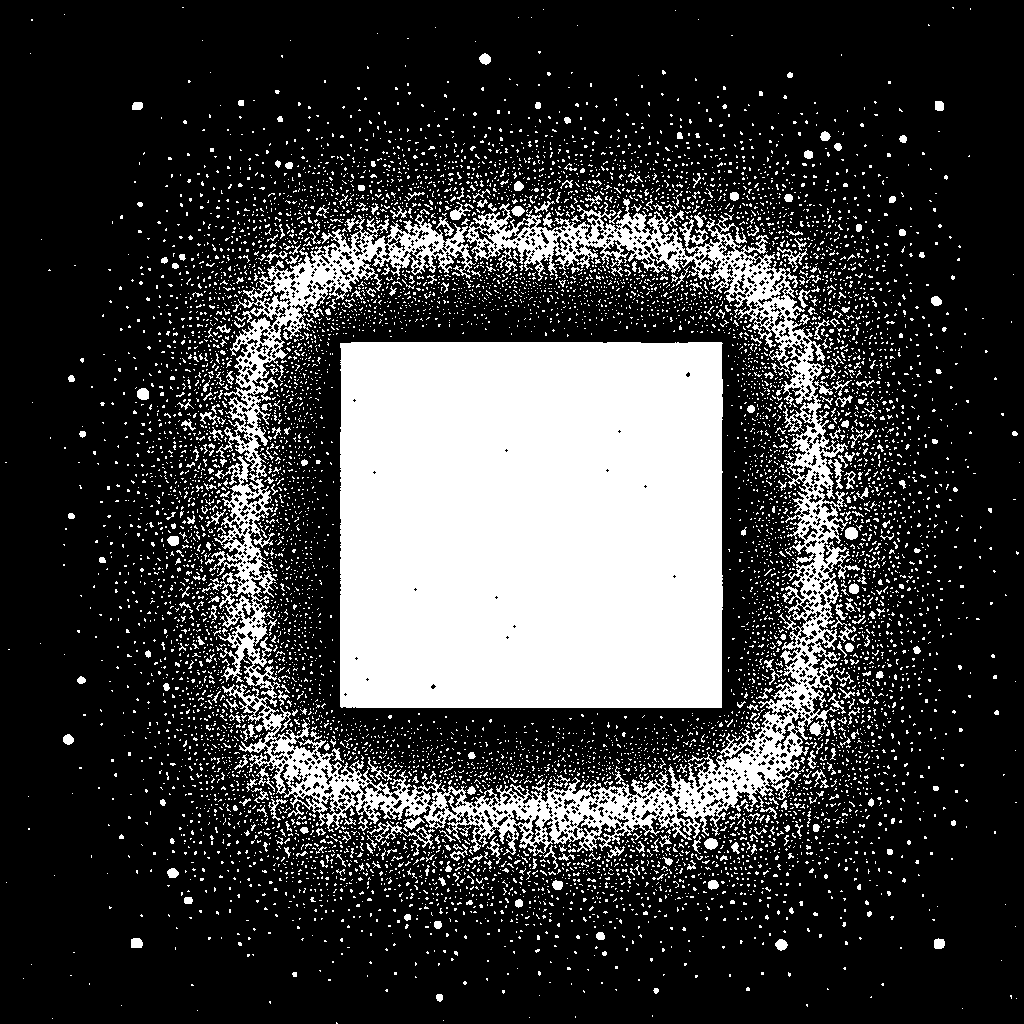

-1

In [8]:
import numpy as np, cv2
#from Common.filters import erode, dilate

def opening(img, mask):                     # 열림 연산
    tmp = erode(img, mask)                  # 침식
    dst = dilate(tmp, mask)                 # 팽창
    return dst

def closing(img, mask):                     # 닫힘 연산
    tmp = dilate(img, mask)
    dst = erode(tmp, mask)
    return dst

image = cv2.imread("/content/morph.webp", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 오류")

mask = np.array([[0, 1, 0],                 # 마스크 초기화
                 [1, 1, 1],
                 [0, 1, 0]]).astype("uint8")
th_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]   # 영상 이진화

dst1 = opening(th_img, mask)                            # 사용자 정의 열림 함수 호출
dst2 = closing(th_img, mask)                            # 사용자 정의 닫힘 함수 호출
dst3 = cv2.morphologyEx(th_img, cv2.MORPH_OPEN, mask)   # OpenCV의 열림 함수
dst4 = cv2.morphologyEx(th_img, cv2.MORPH_CLOSE, mask, 1)  # OpenCV의 닫힘 함수

cv2_imshow(dst1);       cv2_imshow(dst2)
cv2_imshow(dst3);     cv2_imshow(dst4)
cv2.waitKey(0)

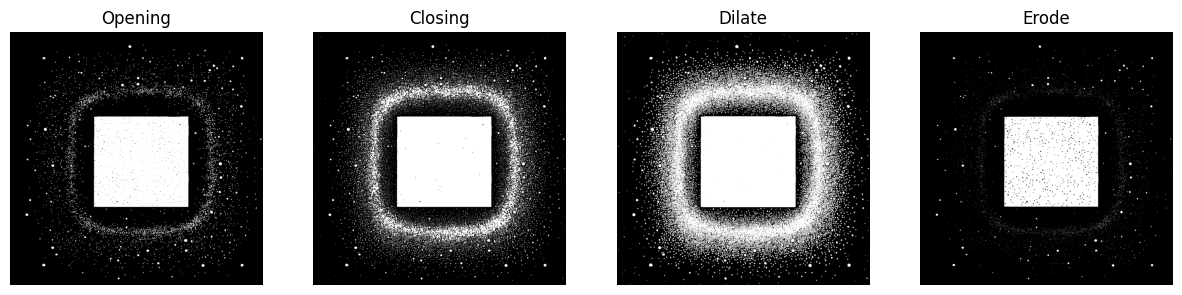

In [10]:
import matplotlib.pyplot as plt
# 이미지 처리
dst1 = opening(th_img, mask)  # opening
dst2 = closing(th_img, mask)  # closing
dst3 = dilate(th_img, mask)   # dilate
dst4 = erode(th_img, mask)    # erode

# matplotlib를 사용하여 이미지 표시
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(dst1, cmap='gray')
plt.axis('off')
plt.title('Opening')

plt.subplot(1, 4, 2)
plt.imshow(dst2, cmap='gray')
plt.axis('off')
plt.title('Closing')

plt.subplot(1, 4, 3)
plt.imshow(dst3, cmap='gray')
plt.axis('off')
plt.title('Dilate')

plt.subplot(1, 4, 4)
plt.imshow(dst4, cmap='gray')
plt.axis('off')
plt.title('Erode')

plt.show()